Nim examples, and notes on this kernel
======================================

Hello World
-----------

In [1]:
echo "hello world!"

hello world!


Plotting
-----------

A naive wrapper around a small subset of matplotlib is available.

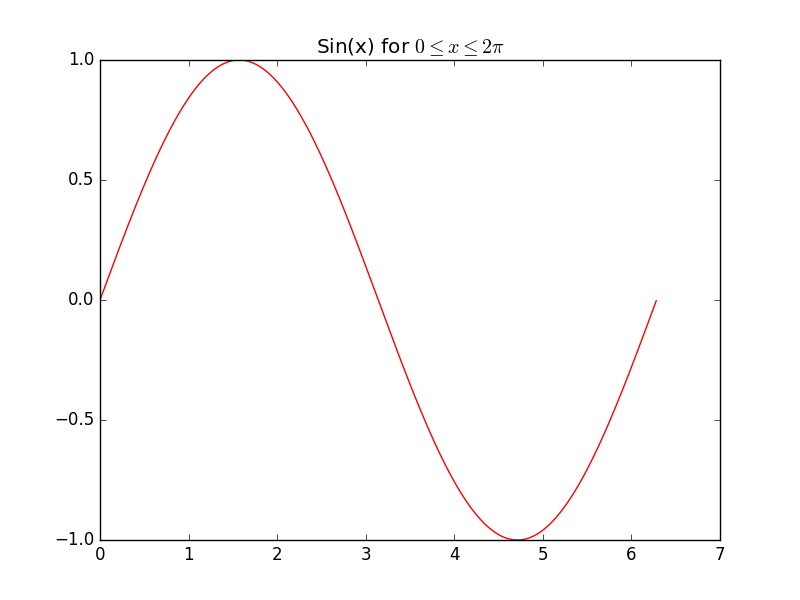

Loaded dynamic library: 'python35.dll'


In [2]:
#>inlineplot
import math,sequtils

iterator linsp*[T](fm,to,step:T):T =
    if fm<to:
      var res: T = T(fm)
      while res<=to:
        yield res
        res+=step
    elif fm>to:
      var res: T = T(fm)
      while res>=to:
        yield res
        res-=step
    else:
      yield fm
    

proc linspace* [T](fm,to,step:T):seq[T] = toSeq(linsp(fm, to, step)) # Result and step should be same type, not all 4


proc sin (x:openarray[float]):seq[float] =
  result = map(x) do (x:float)->float : 
    sin(x)

let xx = linspace(0.0,2*Pi,0.01)

show:
    plot(xx,sin(xx))
    title(r"Sin(x) for $0\leq x\leq 2\pi$" )

Notes on sharing globals
--------------------------------------------
For now, every block is considered a separate `.nim` file, that are then imported and chained together.  
This has the side effect of re-running top level instructions.  
As a convenience, `echo` are wrapped in `when isMainModule` blocks after evaluation, but other instructions are still run.  

Lets define a var `x`.

In [3]:
var x = 12

Loaded dynamic library: 'python35.dll'


In [4]:
echo x

block4.nim(5, 6) Error: undeclared identifier: 'x'


See? We got `undeclared identifier: 'x'`  
But if we export it:

In [5]:
var x* = 12

Loaded dynamic library: 'python35.dll'


Then we can use it in subsequent blocks:

In [6]:
echo x

Loaded dynamic library: 'python35.dll'
12


Note that this **only** works for sharing globals, and it won't keep changes made to them.  
It is also somewhat buggy, expecially changing the value of x seems to kill subsequent uses of it, but this is an **experimental** kernel afterall.

Import
------------
If the host system as the correct package installed, you can use `import` like normal.  
Files in the working directory of the notebook are not picked up, because the compilation happens in a temp folder.

In [7]:
import math
var x = 5.0
echo x.pow(2.0)

Loaded dynamic library: 'python35.dll'
25.0


In [8]:
import sequtils
var s : seq[char] = toSeq("hello notebook!".items)
var z : seq[char] = toSeq("!koobeton olleh".items)
echo zip(s,z)

Loaded dynamic library: 'python35.dll'
@[(a: h, b: !), (a: e, b: k), (a: l, b: o), (a: l, b: o), (a: o, b: b), (a:  , b: e), (a: n, b: t), (a: o, b: o), (a: t, b: n), (a: e, b:  ), (a: b, b: o), (a: o, b: l), (a: o, b: l), (a: k, b: e), (a: !, b: h)]


Show the tempfile name
----------------------
Show tempfile name for this cell which happens to be the module name and therefor has a limited charset


In [9]:
template FILE: string = instantiationInfo().filename

echo "Module tempfile: '" & FILE() & "'"

Loaded dynamic library: 'python35.dll'
Module tempfile: 'block9.nim'


Misc examples
-------------

### Simple procs

In [10]:
proc square(x:int):int =
    result = x*x

echo square(5)

Loaded dynamic library: 'python35.dll'
25


### Json parsing

In [11]:
import json
 
var data = parseJson("""{ "foo": 1, "bar": [10, "apples"] }""")
echo data["foo"]
echo data["bar"]
 
var js = %[%{"name": %"John", "age": %30}, %{"name": %"Susan", "age": %31}]
echo js

Loaded dynamic library: 'python35.dll'
1
[10,"apples"]
[{"name":"John","age":30},{"name":"Susan","age":31}]
